# Prediction of Sales
  - Author: Loveida Lucero

## Project Overview

## Load and Inspect Data

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loaded Data

In [2]:
fname = '/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fname)

In [3]:
# View first 5 rows
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# View summary info
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning


Rows/Colums:

In [5]:
df_sales.shape

(8523, 12)

Datatypes of each variable:

In [6]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Duplicates

Checking for duplicated data:

In [7]:
df_sales.duplicated().sum()

0

- No duplicates found.

### Missing Values

Identify missing values:

In [8]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Item_Weight has 1463 missing values.
- Outlet_Size has 2410 missing values.

Percentages of missing values:

In [9]:
df_sales.isna().sum()/len(df_sales) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Address the missing values using a placeholder value:

In [10]:
# Deactivated for part 4 viz
#df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(value = -1)
#df_sales['Item_Weight'].value_counts()

In [11]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna(value = 'MISSING')
df_sales['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Confirm missing values were replaced:

In [12]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Inconsistencies

Create filters to identify all values per object type:

In [13]:
data_types = df_sales.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
for col in str_cols:
    print(f'- {col}:')
    print(df_sales[col].value_counts(dropna=False))
    print("\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926


- There are inconsistnecies with the spelling of the following categories in Item_Fat_Content.
  - **LF** should be **Low Fat**
  - **reg** should be **Regular**
  - **low fat** should be **Low Fat**


Fix all inconsistent categories:

In [15]:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

Confirm category inconsistencies were addressed:

In [16]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Summary statistics of each (min, max, mean)for numerical columns:

In [17]:
stats = df_sales.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Display clean Data

In [18]:
df_sales.dtypes
df_sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,MISSING,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,MISSING,Tier 2,Supermarket Type1,4710.5350


# Exploratory Data Analasis

##Histogram to view distribution of numerical features:

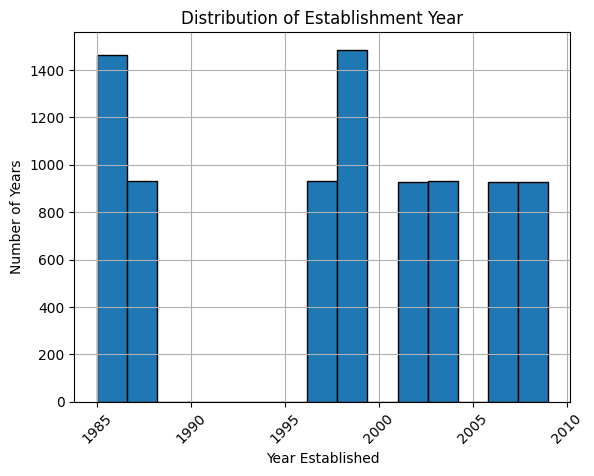

In [19]:
# graph Outlet_Establishment_Year
ax = df_sales['Outlet_Establishment_Year'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')

# set labels
ax.set_title('Distribution of Establishment Year')
ax.set_xlabel('Year Established')
ax.set_ylabel('Number of Years');

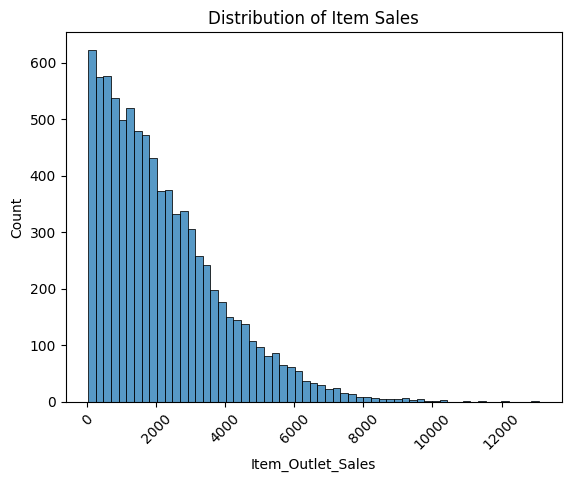

In [20]:
# graph Item_Outlet_Sales
ax = sns.histplot(data=df_sales,
                  x='Item_Outlet_Sales')

#Custumize
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Distribution of Item Sales');

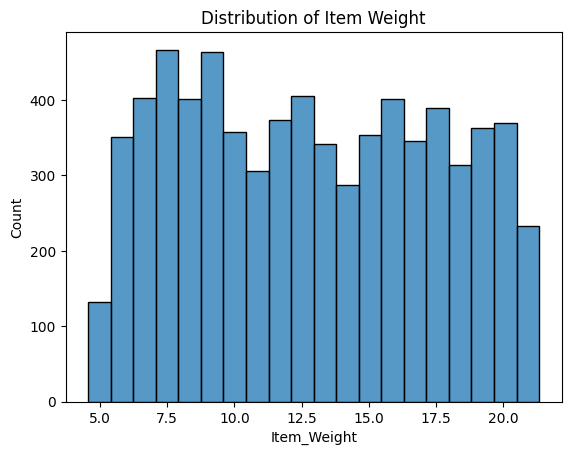

In [21]:
# graph Item_Weight
ax = sns.histplot(data=df_sales,
                  x='Item_Weight')

#Custumize
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x');
ax.set_title('Distribution of Item Weight');

##Boxplots to view statistical data of numerical features:

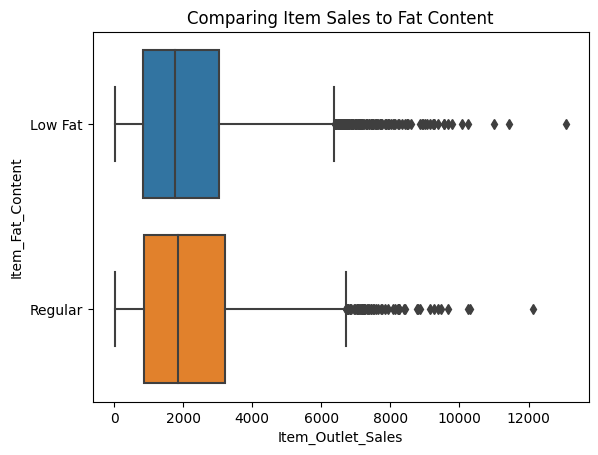

In [22]:
#graph item fat contentand item outlet sales
ax = sns.boxplot(data=df_sales, y='Item_Fat_Content', x="Item_Outlet_Sales")

# set title
ax.set_title("Comparing Item Sales to Fat Content");

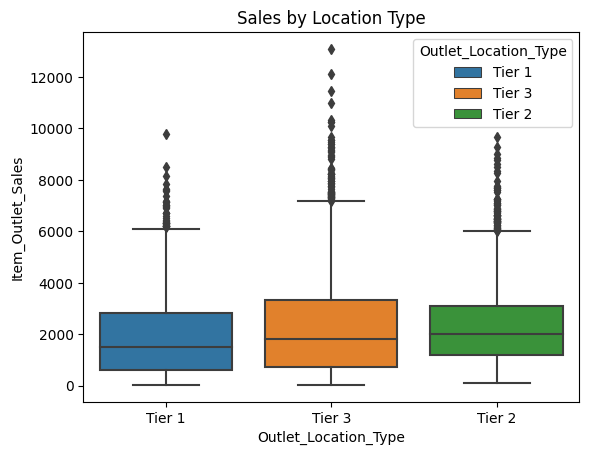

In [23]:
# graph outlet sales and outlet location type
ax = sns.boxplot(data=df_sales, x='Outlet_Location_Type',
                y='Item_Outlet_Sales',
                hue='Outlet_Location_Type',
                dodge=False)

# set title
ax.set_title('Sales by Location Type');


##Countplots to view frequency of each class of categorical features:

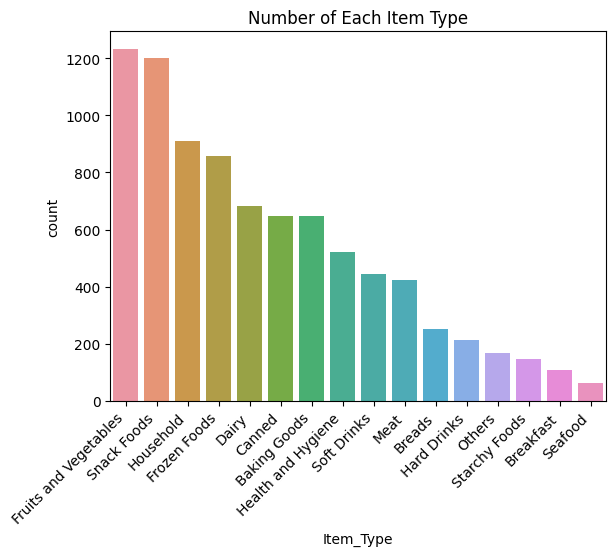

In [24]:
#set value caounts for Item Type
val_counts = df_sales['Item_Type'].value_counts()

#graph Item type
ax = sns.countplot(data=df_sales, x="Item_Type",
                   order=val_counts.index)
#customize
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Number of Each Item Type');

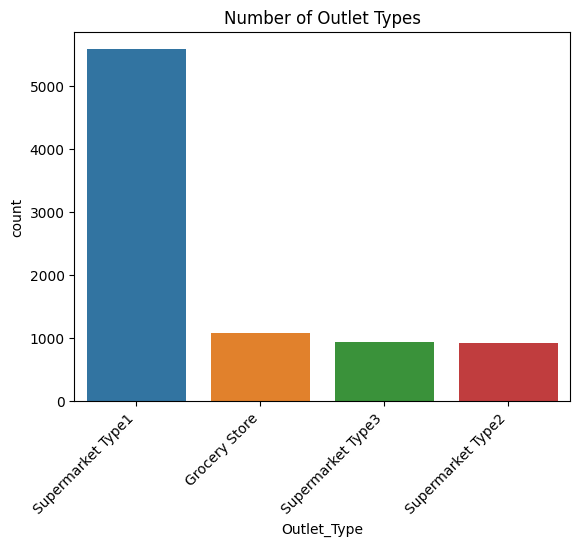

In [25]:
#set value counts for Outlet Type
tp_val_counts = df_sales['Outlet_Type'].value_counts()

#graph Outlet type
ax = sns.countplot(data=df_sales, x="Outlet_Type",
                   order=tp_val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Number of Outlet Types');

##Heatmap to view correlations between features:

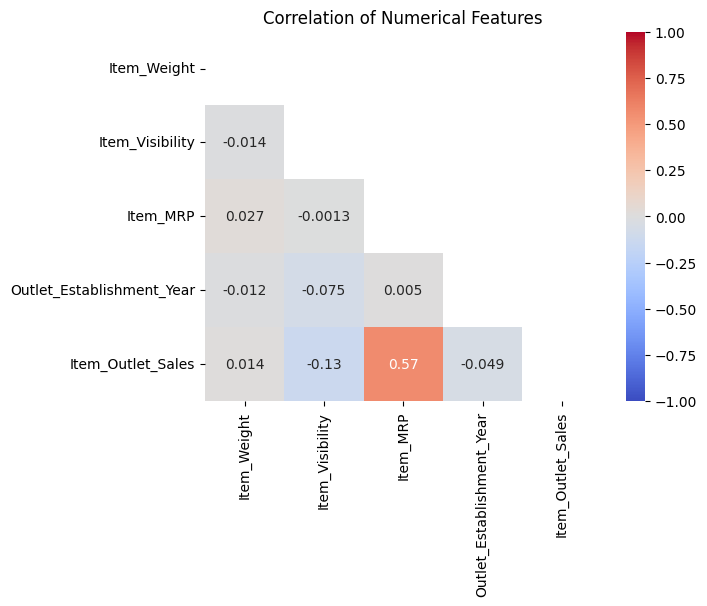

In [26]:
#set corr for item visibility and sales
corr = df_sales.corr(numeric_only = True)

#block upper triangle(mirror)image
mask = np.triu(np.ones_like(corr))

#graph features
ax = sns.heatmap(corr,
                 annot=True,
                 cmap='coolwarm',
                 vmin=-1,
                 vmax=1,
                 mask=mask)

# set label
ax.set_title('Correlation of Numerical Features');

# Feature Inspection

Establishing null values

In [27]:
# Replace placeholder values with null values
df_sales['Outlet_Size']= df_sales['Outlet_Size'].replace({'MISSING': None})
#Deactivated code previously used to fill nullin Item_Weight
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
## Display the descriptive statistics for the numeric columns
df_sales.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
## Display the descriptive statistics for the numeric columns
df_sales.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


Univariate Functions:

In [30]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df_sales.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [31]:
def explore_numeric(df, x, figsize=(6,5) ):

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

Multivariate Function:

In [32]:
def plot_categorical_vs_target(df_sales, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df_sales.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

In [33]:
def plot_numeric_vs_target(df_sales, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):

  # Calculate the correlation
  corr = df_sales[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df_sales, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

##Item_Identifier
- Product ID

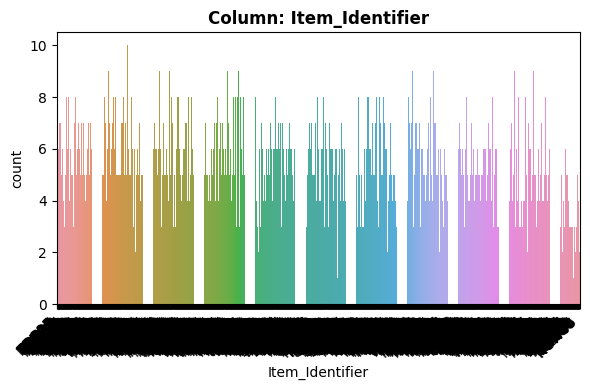

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [34]:
explore_categorical(df_sales, 'Item_Identifier');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
  - No need to impute
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - High (1,559)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - This feature should be dropped due to high amount of unique values

  ---

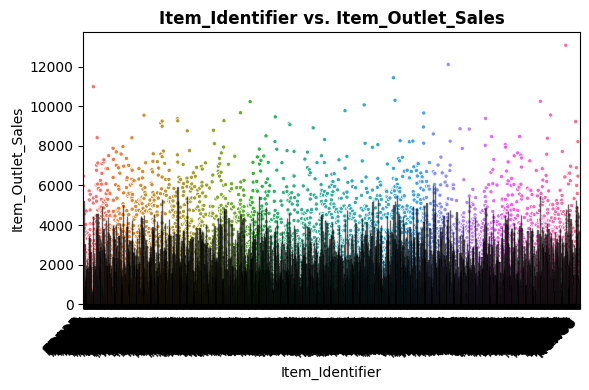

In [35]:
plot_categorical_vs_target(df_sales, x ='Item_Identifier');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

##Item_Weight
- Weight of product

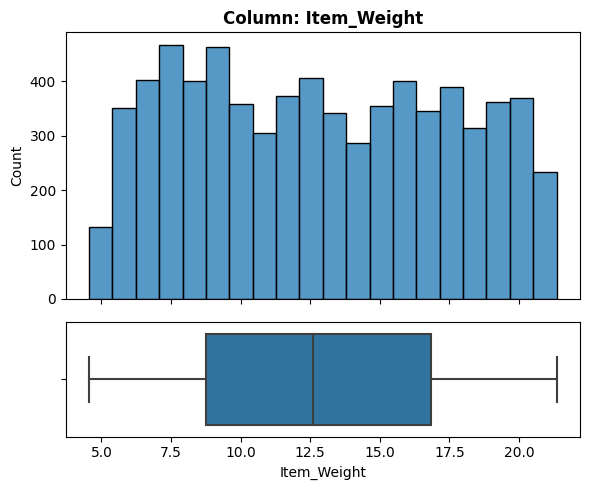

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [36]:
explore_numeric(df_sales, x= 'Item_Weight');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 1,463 (17.17%) null values
  - There is not enough null values to drop the column
  -  Impute with median
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - N/A (numeric)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

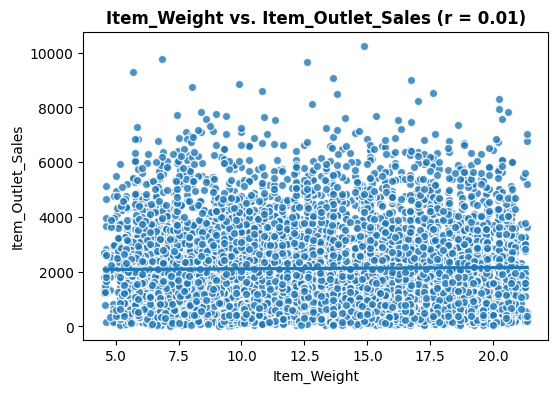

In [37]:
plot_numeric_vs_target(df_sales, x='Item_Weight');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

##Item_Fat_Content
- Whether the product is low-fat or regular

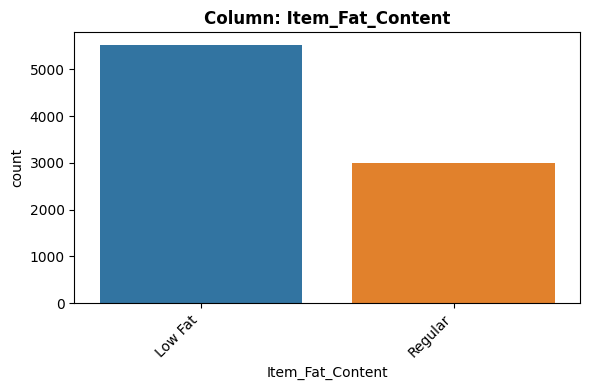

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [38]:
explore_categorical(df_sales, 'Item_Fat_Content');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quai-constant
- What is the cardinality? Is it high (>10)?
  - Low(2)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

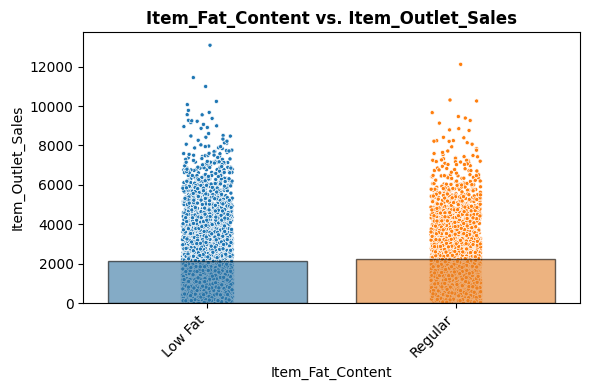

In [39]:
plot_categorical_vs_target(df_sales, x='Item_Fat_Content');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

##Item_Visibility
- The percentage of total display area of all products in a store aloocated to the particular product.

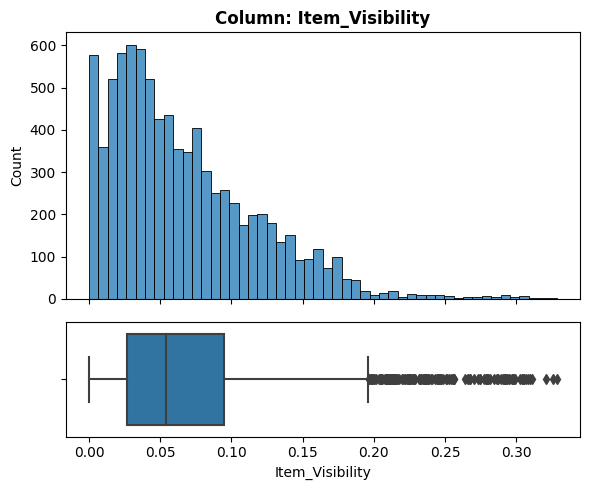

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [40]:
explore_numeric(df_sales, x= 'Item_Visibility');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - N/A (numeric)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No
  ---

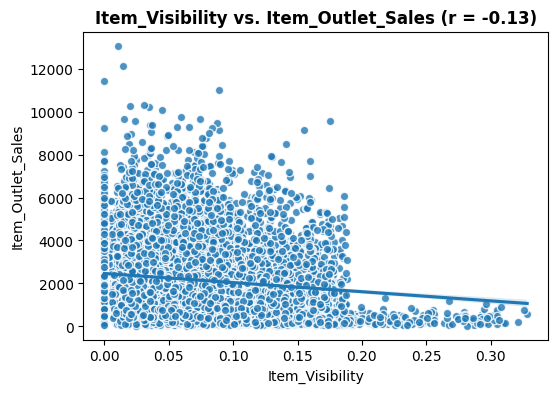

In [41]:
plot_numeric_vs_target(df_sales, x='Item_Visibility');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - No

##Item_Type
- The category to which the product belongs.

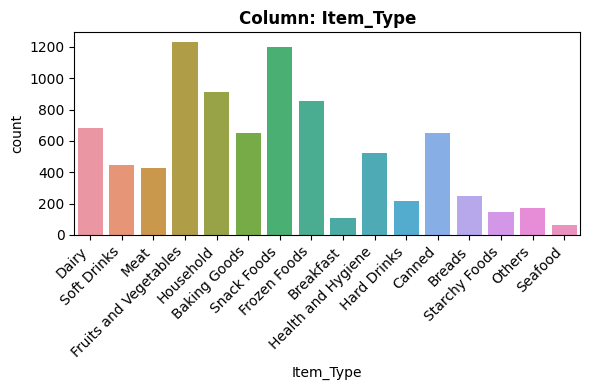

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [42]:
explore_categorical(df_sales, x='Item_Type');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not a constant or quai-constant
- What is the cardinality? Is it high (>10)?
  - High(16)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

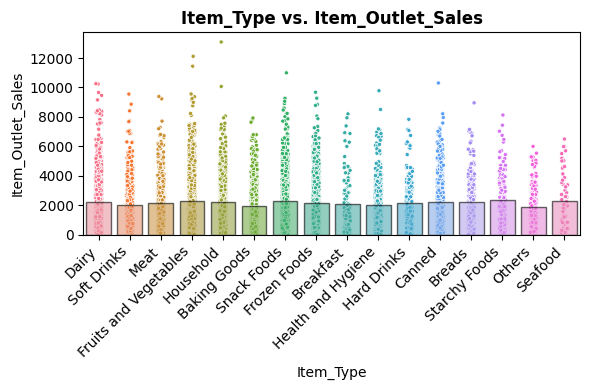

In [43]:
plot_categorical_vs_target(df_sales, x='Item_Type');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

##Item_MRP
- Maximum Retail Price (list price) of the product

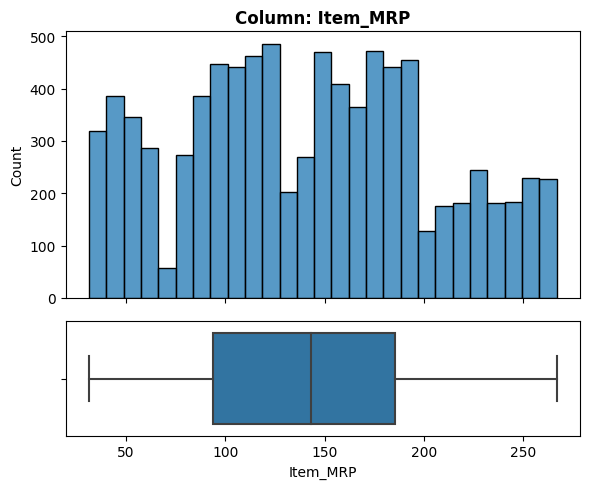

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [44]:
explore_numeric(df_sales, x='Item_MRP');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quai-constant
- What is the cardinality? Is it high (>10)?
  - N/A numeric
- Would we know this feature before the target is determined?
  - No
- Is there a business case/understanding reason to exclude based on our business case?
  - No

---

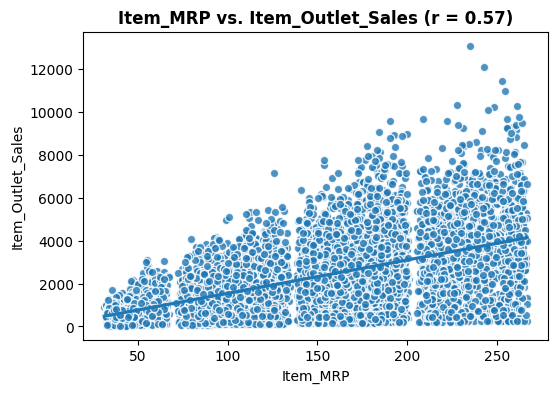

In [45]:
plot_numeric_vs_target(df_sales, x= 'Item_MRP');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Yes

##Outlet_Identifier
- Store ID

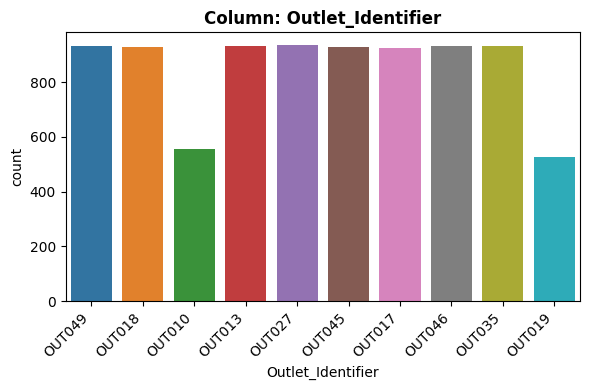

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [46]:
explore_categorical(df_sales, x= 'Outlet_Identifier');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - Low (10)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

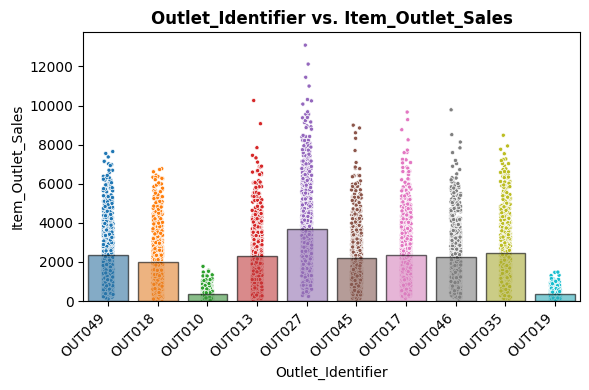

In [47]:
plot_categorical_vs_target(df_sales, x='Outlet_Identifier');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

##Outlet_Establishment_Year
- The year in which store was established

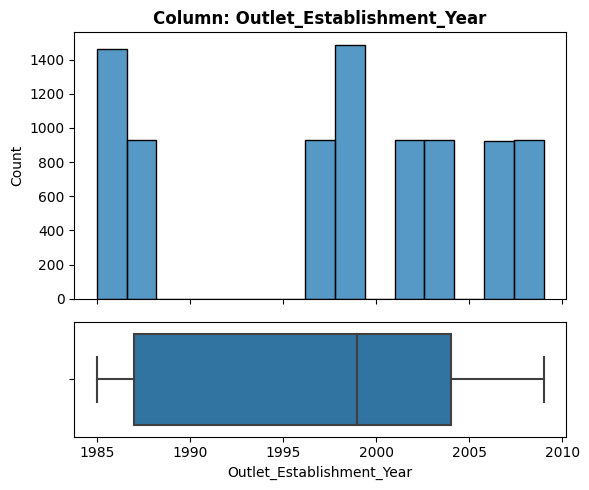

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [48]:
explore_numeric(df_sales, x= 'Outlet_Establishment_Year');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - N/A (numeric)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

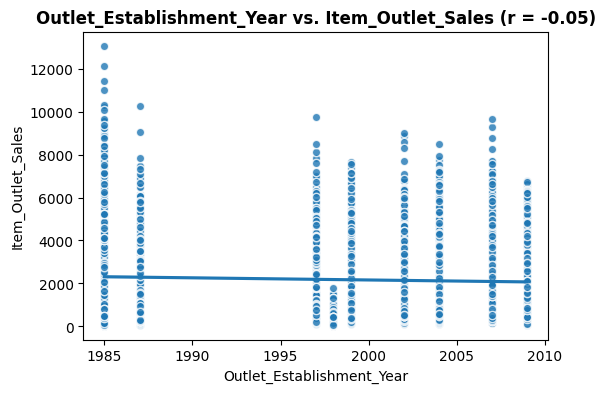

In [49]:
plot_numeric_vs_target(df_sales, x='Outlet_Establishment_Year');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

##Outlet_Size
- The size of the store in terms of ground area covered

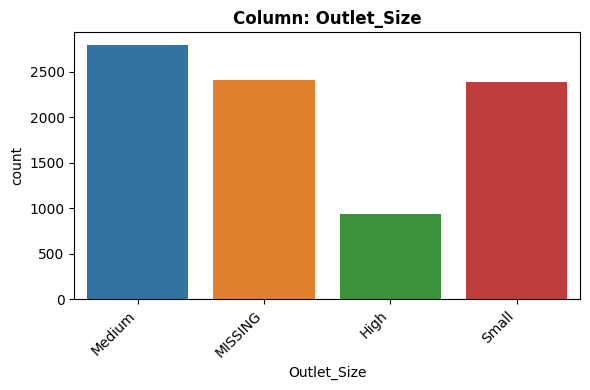

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [50]:
explore_categorical(df_sales, 'Outlet_Size');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 2,410 (28.28%) null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - Low (4)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

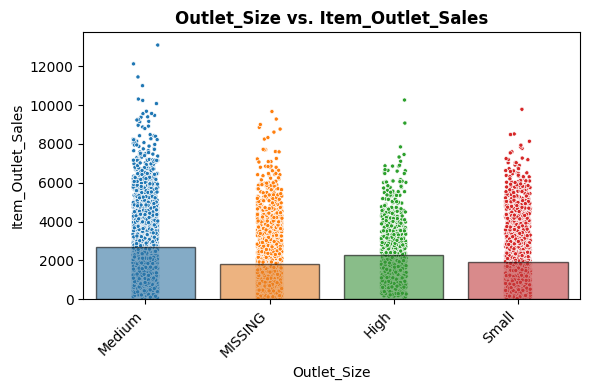

In [51]:
plot_categorical_vs_target(df_sales, x='Outlet_Size');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

##Outlet_Location_Type
- The type of area in which the store is located

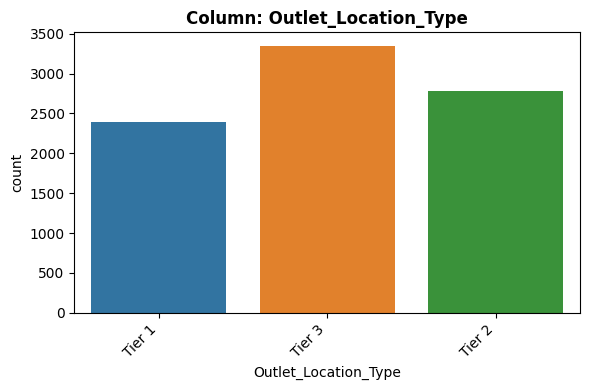

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [52]:
explore_categorical(df_sales, 'Outlet_Location_Type');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - Low (3)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

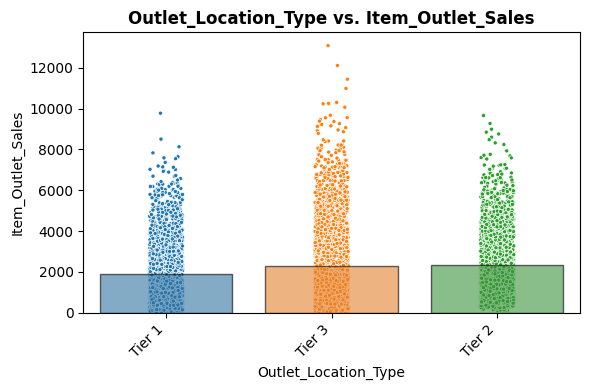

In [53]:
plot_categorical_vs_target(df_sales, x='Outlet_Location_Type');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - No

##Outlet_Type
- Whether the outlet is a grocery store or some sort of supermarket

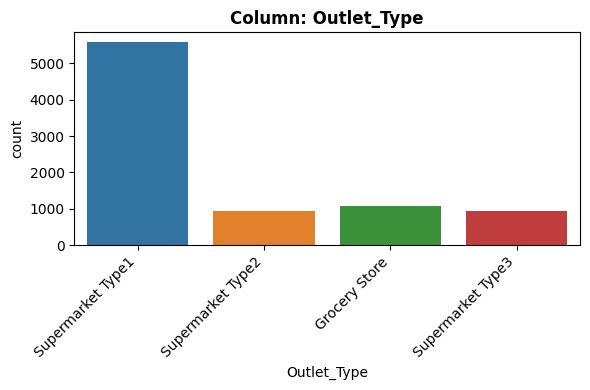

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [54]:
explore_categorical(df_sales, 'Outlet_Type');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - Low (4)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

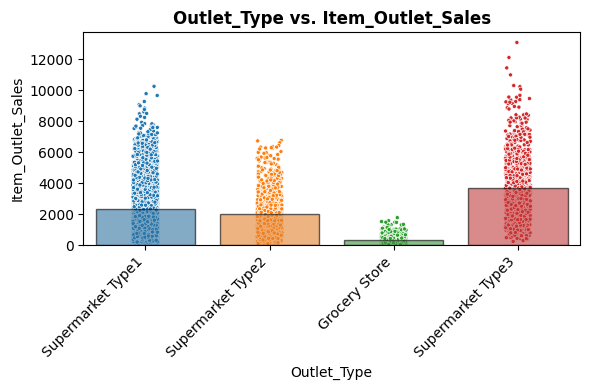

In [55]:
plot_categorical_vs_target(df_sales, x='Outlet_Type');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - Yes

##Item_Outlet_Sales
- Sales of the product in the particular store. This is the target variable to be predicted.

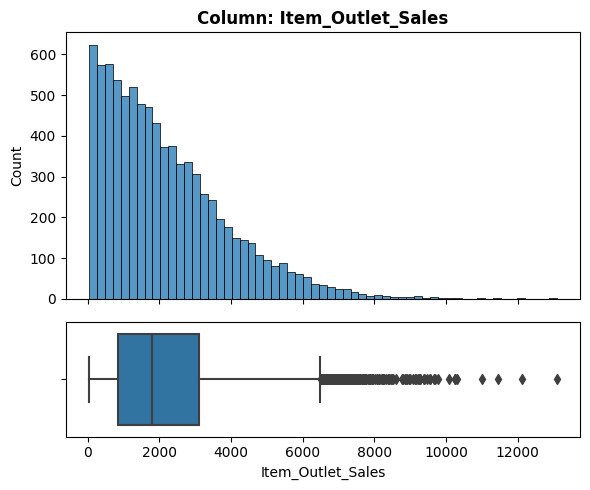

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [56]:
explore_numeric(df_sales, x= 'Item_Outlet_Sales');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - N/A (numeric)
- Would we know this feature before the target is determined?
  - N/A (is target)
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

#Machine Learning

**Imports**

In [57]:
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

##Load Data

In [58]:
fname = '/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv'
df2_sales = pd.read_csv(fname)
df2_sales.info()
df2_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Duplicates

In [59]:
df2_sales.duplicated().sum()

0

## Inconsistencies

Create filters to identify all values per object type:

In [60]:
data_types = df2_sales.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [61]:
for col in str_cols:
    print(f'- {col}:')
    print(df2_sales[col].value_counts(dropna=False))
    print("\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926


- There are inconsistnecies with the spelling of the following categories in Item_Fat_Content.
  - **LF** should be **Low Fat**
  - **reg** should be **Regular**
  - **low fat** should be **Low Fat**


Fix all inconsistent categories:

In [62]:
df2_sales['Item_Fat_Content'] = df2_sales['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

Confirm category inconsistencies were addressed:

In [63]:
df2_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##Train Test Split

In [64]:
# define the feature
y = df2_sales['Item_Outlet_Sales']
X = df2_sales.drop(columns = 'Item_Outlet_Sales')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Pipeline

In [65]:
# Define the feature
ord_cols = ['Outlet_Size']

#Impute with most frequent
impute_common = SimpleImputer(strategy='most_frequent')

# Ordinal Encoder
size_order = ['Small', 'Medium', 'High']

ord_encoded = OrdinalEncoder(categories=[size_order])

# Scale
scaler=StandardScaler()

# Making the pipeline
ord_pipe = make_pipeline(impute_common, ord_encoded, scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [66]:
ord_cols

['Outlet_Size']

In [67]:
# Define feature
cat_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
cat_cols = cat_cols.drop('Item_Identifier')
# Impute with MISSING
impute_missing = SimpleImputer(strategy='constant', fill_value='MISSING')

# OHE
cat_ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# making the pipeline
cat_pipe = make_pipeline(impute_missing, cat_ohe)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [68]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

# Impute with mean
impute_common = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

# Making the pipeline
num_pipe = make_pipeline(impute_common, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

##Tuples

In [69]:
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

In [70]:
cat_tuple = ('categorical', cat_pipe, cat_cols)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [71]:
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

##Column Transformer

In [72]:
preprocessor = ColumnTransformer([num_tuple, ord_tuple, cat_tuple],
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencod...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

##Fit

In [73]:
# Fit on training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencod...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

##Transform

In [74]:
# Transform the training data
X_train_processed = preprocessor.transform(X_train)
X_train_processed.describe()
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.846302,-0.712775,1.828109,1.327849,0.287374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.585989,-1.291052,0.603369,1.327849,0.287374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.100291,1.813319,0.244541,0.136187,0.287374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.135627,-1.004931,-0.952591,0.732018,-1.384048,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.556247,-0.965484,-0.336460,0.493686,0.287374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [75]:
# Transform the testing data
X_test_processed = preprocessor.transform(X_test)
X_test_processed.describe()
X_test_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.361173,-0.776646,-0.998816,-1.293807,1.958796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.146276,0.100317,-1.585194,-0.102145,-1.384048,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.408503,-0.482994,-1.595784,0.136187,0.287374,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,-0.147620,-0.415440,0.506592,-1.532139,0.287374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-0.610268,-1.047426,0.886725,0.732018,-1.384048,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#Regression Modeling

**Import**

In [76]:
## Import the model
# import standard packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno

# import modeling tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# set default output to pandas
from sklearn import set_config
set_config(transform_output='pandas')

from sklearn.linear_model import Lasso

In [106]:
def regression_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):

  """Helper Function
  This custom function accept true targets and predictions with custom label
  Calculate and print  MAE, MSE , RMSE and R2 scores by saving it in a dictionary"""

  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

In [107]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(pipe, X_train, y_train, X_test, y_test,
                       model_name='Regression Model'):

  """Takes a regression model, training features and target and testing features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)

  metrics = ['train_MAE','test_MAE',
             'train_MSE','test_MSE',
             'train_RMSE','test_RMSE',
             'train_R2', 'test_R2']

  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_mse = round(mean_squared_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_mse = round(mean_squared_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[model_name])
  scores.loc[model_name, :] = [train_mae, test_mae,
                               train_mse, test_mse,
                              train_rmse, test_rmse,
                              train_r2, test_r2]

  return scores

##Dummy Model

In [79]:
## Create an instance of the model
dummy = DummyRegressor(strategy='mean')
## Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)
## Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(stra...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

In [108]:
## Display the Model's metrics
scores_df = evaluate_regression(dummy_pipe, X_train, y_train,
                          X_test, y_test,
                          model_name='Dummy Model')

display(scores_df)

,train_MAE,test_MAE,train_MSE,test_MSE,train_RMSE,test_RMSE,train_R2,test_R2
Dummy Model,1360.2184,1326.121,2959455.7045,2772144.4627,1720.3069,1664.9758,0.0,-0.0048


##Linear Modeling

**Default**

In [81]:
## Create an instance of the model
lasso = Lasso()
## Create a model pipeline
lasso_pipe = make_pipeline(preprocessor, lasso)
## Fit the model
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(stra...
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('lasso', Lasso())])

In [109]:
## Display model performance metrics using a function
lasso_scores = evaluate_regression(lasso_pipe, X_train, y_train,
                          X_test, y_test,
                           model_name='Lasso Model')

scores_df = pd.concat([scores_df, lasso_scores])
display(scores_df)

,train_MAE,test_MAE,train_MSE,test_MSE,train_RMSE,test_RMSE,train_R2,test_R2
Dummy Model,1360.2184,1326.121,2959455.7045,2772144.4627,1720.3069,1664.9758,0.0,-0.0048
Lasso Model,846.8957,803.0781,1297982.9332,1191725.8453,1139.2905,1091.662,0.5614,0.5681


**Tune Model**

In [83]:
## Display the list of available hyperparameters for tuning
lasso_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencod...
                                                     StandardScaler())]),
                                    ['Outlet_Size']),
                           

In [84]:
## Create a parameter grid
## include lasso__alpha and lasso__fit_intercept
params = {'lasso__alpha':[.0001, .001, .01, .1, 1, 10, 100, 1000],
          'lasso__fit_intercept':[True,False]}

## Create and fit the GridSearchCV pipeline
lasso_gs = GridSearchCV(lasso_pipe, params)
lasso_gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.486e+09, tolerance: 1.526e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.469e+09, tolerance: 1.516e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+09, tolerance: 1.498e

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimpu...
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                          1000],
                         'lasso__fit_intercept': [True, False]})

In [85]:
# Extract the best_estimator_ from the GridSearchCV pipeline
best_lasso = lasso_gs.best_estimator_

# define model metrics scores using the evaluate_regression function
lasso_tuned_scores = evaluate_regression(best_lasso,
                                         X_train, y_train,
                                         X_test, y_test,
                                         model_name='Tuned_Lasso Model')

In [86]:
# Concatenate the tuned model metrics to the scores_df
scores_df = pd.concat([scores_df, lasso_tuned_scores])

In [110]:
# Display the scores_df
display(scores_df)

,train_MAE,test_MAE,train_MSE,test_MSE,train_RMSE,test_RMSE,train_R2,test_R2
Dummy Model,1360.2184,1326.121,2959455.7045,2772144.4627,1720.3069,1664.9758,0.0,-0.0048
Lasso Model,846.8957,803.0781,1297982.9332,1191725.8453,1139.2905,1091.662,0.5614,0.5681


- The model performed nearly identical with the test and training data on the Tuned Lasso Model by a margin of 0.0068 (train_R2 0.5614, test_R2 0.5682.) The model is considered underfit due to the low scores.

##Random Forest

###Default Model

In [88]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(stra...
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [111]:
## Display model performance metrics using a function
rf_scores = evaluate_regression(rf_pipe, X_train, y_train,
                          X_test, y_test,
                           model_name='Random Forest Model')

scores_df = pd.concat([scores_df, rf_scores])
display(scores_df)

,train_MAE,test_MAE,train_MSE,test_MSE,train_RMSE,test_RMSE,train_R2,test_R2
Dummy Model,1360.2184,1326.121,2959455.7045,2772144.4627,1720.3069,1664.9758,0.0,-0.0048
Lasso Model,846.8957,803.0781,1297982.9332,1191725.8453,1139.2905,1091.662,0.5614,0.5681
Random Forest Model,295.9845,765.5206,182240.3478,1216485.908,426.8962,1102.9442,0.9384,0.5591


- The default Random Forest Model is overfitted with the training data performing almost twice as good as the test data(trian_R2 0.9384, test_R_2 0.5591)
- While the training data did perform better on the Random Forest Model, the test data from the Tuned Lasso Model performed better.

###Tune Model

In [90]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencod...
                                                     StandardScaler())]),
                                    ['Outlet_Size']),
                           

In [91]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None, 10, 15, 20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4,5],
          'randomforestregressor__oob_score':[True,False],
          }

In [92]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv=2, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 128 candidates, totalling 256 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpl...
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4,
                                                                     5],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [93]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__min_samples_leaf': 5,
 'randomforestregressor__n_estimators': 150,
 'randomforestregressor__oob_score': True}

In [112]:
## Display model performance metrics using a function
best_rf = gridsearch.best_estimator_
tuned_rf_scores = evaluate_regression(best_rf, X_train, y_train,
                          X_test, y_test,
                           model_name='Tuned Random Forest Model')

scores_df = pd.concat([scores_df, tuned_rf_scores])
display(scores_df)

,train_MAE,test_MAE,train_MSE,test_MSE,train_RMSE,test_RMSE,train_R2,test_R2
Dummy Model,1360.2184,1326.121,2959455.7045,2772144.4627,1720.3069,1664.9758,0.0,-0.0048
Lasso Model,846.8957,803.0781,1297982.9332,1191725.8453,1139.2905,1091.662,0.5614,0.5681
Random Forest Model,295.9845,765.5206,182240.3478,1216485.908,426.8962,1102.9442,0.9384,0.5591
Tuned Random Forest Model,667.0123,732.8445,906708.3781,1107484.0368,952.2124,1052.3707,0.6936,0.5986


- The Tuned Random Forest Model performed better than the default Random Forest Model by 0.0395.

In [113]:
# Display the scores_df sorted by test_RMSE
scores_df.sort_values(by='test_RMSE')

,train_MAE,test_MAE,train_MSE,test_MSE,train_RMSE,test_RMSE,train_R2,test_R2
Tuned Random Forest Model,667.0123,732.8445,906708.3781,1107484.0368,952.2124,1052.3707,0.6936,0.5986
Lasso Model,846.8957,803.0781,1297982.9332,1191725.8453,1139.2905,1091.662,0.5614,0.5681
Random Forest Model,295.9845,765.5206,182240.3478,1216485.908,426.8962,1102.9442,0.9384,0.5591
Dummy Model,1360.2184,1326.121,2959455.7045,2772144.4627,1720.3069,1664.9758,0.0,-0.0048


#Evaluation

Overall I would recomend the Tuned Random Forest Model due to having the highest overalll performance on the Test R2 scores and lowest error margins on the (MAE, MSE, RSME)


###R^2 (Coefficient of Determination) Performance

- The models testing data has 59.86% of the variance of target(Item_Outlet_Sales) explained by the remaining features.



###RSME (Root Mean Squarred Error) Performance

- The model is still underfit because the data RSME shows a low performance on the RSME. The RSME calculaiton on the test data is greater by 100.1583 the train data (train_RSME 952.2125, test_RSME).
- The RSME provides better insight as includes more insight to the outliers or errors for the data. The models RSME has an error calculation of $1052.37 and coupled with the low performance score on the R^2 the data provided and model is not a reliable predictor of the Sales.
